# How much will NYC's Yellow TAXI TRIP cost you??

The rich dataset of New York City's yellow taxis, a treasure trove for any data scientist. This dataset is a detailed chronicle of urban mobility, capturing intricate details of each taxi trip. From temporal data points like pickup and drop-off times to spatial dimensions involving locations, this data offers a granular view of urban transit patterns. It also includes quantitative metrics like trip distance, fare composition, payment methods, and passenger counts. Provided by tech companies under the TPEP/LPEP initiatives, this data is a goldmine for analyzing urban transportation trends, fare dynamics, and passenger behavior. It's not just about taxis and their routes; it's a window into the lifeblood of the city, offering endless possibilities for data-driven insights and urban planning.



Column Descriptions

- VendorID: Identifier for the TPEP provider supplying the record.
    - 1 = Creative Mobile Technologies, LLC
    - 2 = VeriFone Inc.
- tpep_pickup_datetime: The date and time when the meter was activated.
- tpep_dropoff_datetime: The date and time when the meter was turned off.
- Passenger_count: The number of passengers in the vehicle, as entered by the driver.
- Trip_distance: The distance of the trip in miles, as recorded by the taximeter.
- PULocationID: TLC Taxi Zone where the meter was engaged.
- DOLocationID: TLC Taxi Zone where the meter was disengaged.
- RateCodeID: The applicable rate code at the end of the trip.
    - 1 = Standard rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester   
    - 5 = Negotiated fare
    - 6 = Group ride
- Store_and_fwd_flag: Indicates if the trip record was stored in the vehicle's memory before transmission to the vendor due to lack of server connection.
    - Y = Store and forward trip
    - N = Not a store and forward trip
- Payment_type: How the passenger paid for the trip, represented by a numeric code.
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip
- Fare_amount: The fare as calculated by the meter based on time and distance.
- Extra: Additional charges, currently including only the $0.50 and $1 rush hour and overnight charges.
- MTA_tax: A $0.50 tax automatically added based on the metered rate.
- Improvement_surcharge: A $0.30 surcharge added at the start of the trip, implemented since 2015.
- Tip_amount: Credit card tip amounts. (Note: Cash tips are not recorded here.)
- Tolls_amount: Total tolls paid during the trip.
- Total_amount: The total charge to passengers, excluding cash tips.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
df = pd.read_parquet("/Users/karnavivek/Downloads/yellow_tripdata_2024-01.parquet")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [89]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,2964624.0,1.754204,1.0,2.0,2.0,2.0,6.0,0.43259
tpep_pickup_datetime,2964624,2024-01-17 00:46:36.431092,2002-12-31 22:59:39,2024-01-09 15:59:19.750000,2024-01-17 10:45:37.500000,2024-01-24 18:23:52.250000,2024-02-01 00:01:15,NaN
tpep_dropoff_datetime,2964624,2024-01-17 01:02:13.208130,2002-12-31 23:05:41,2024-01-09 16:16:23,2024-01-17 11:03:51.500000,2024-01-24 18:40:29,2024-02-02 13:56:52,NaN
passenger_count,2824462.0,1.339281,0.0,1.0,1.0,1.0,9.0,0.850282
trip_distance,2964624.0,3.652169,0.0,1.0,1.68,3.11,312722.3,225.462572
RatecodeID,2824462.0,2.069359,1.0,1.0,1.0,1.0,99.0,9.823219
PULocationID,2964624.0,166.017884,1.0,132.0,162.0,234.0,265.0,63.623914
DOLocationID,2964624.0,165.116712,1.0,114.0,162.0,234.0,265.0,69.31535
payment_type,2964624.0,1.161271,0.0,1.0,1.0,1.0,4.0,0.580869
fare_amount,2964624.0,18.175062,-899.0,8.6,12.8,20.5,5000.0,18.949548


Observations:<br>

- Just by looking at this, we can see -ve values for fare amount (which doesnt make sense)
- We can see abnormally large numbers for trip distance, which also raises suspicion, we will keep these in mind & correctly remove them

In [90]:
df.shape

(2964624, 19)

In [91]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

Observation:<br>
- passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, Airport_fee all have same 140162 NaN Values.
    - 140162 is 4.73% of Total data, decision here is to remove those values from the dataset & perform our analysis.

In [92]:
df = df.dropna()
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824457,2,2024-01-31 23:10:28,2024-01-31 23:18:30,1.0,3.51,1.0,N,138,129,1,16.3,6.0,0.5,4.76,0.0,1.0,30.31,0.0,1.75
2824458,2,2024-01-31 23:01:04,2024-01-31 23:17:35,1.0,3.36,1.0,N,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.00
2824459,1,2024-01-31 23:08:13,2024-01-31 23:25:00,3.0,3.30,1.0,N,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.00
2824460,1,2024-01-31 23:49:46,2024-01-31 23:53:10,0.0,0.40,1.0,N,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.00


In [93]:
new_df_cols = df.columns.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime'])
new_df_cols #all the columns but with out date & time

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

In [94]:
df_timeless = df.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime'], axis=1)
df_timeless #assigning name to dataframe without datetime

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824457,2,1.0,3.51,1.0,N,138,129,1,16.3,6.0,0.5,4.76,0.0,1.0,30.31,0.0,1.75
2824458,2,1.0,3.36,1.0,N,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.00
2824459,1,3.0,3.30,1.0,N,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.00
2824460,1,0.0,0.40,1.0,N,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.00


In [95]:
def uniques(df):
    unique_ = {}
    for i in new_df_cols:
        uni = df[i].unique()
        unique_[i] = uni
    return unique_

uniques(df)

def uniques_count(df):
    return df.value_counts()

uniques_count(df)


VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_fee
1         2024-01-01 00:00:00   2024-01-01 00:02:49    1.0              0.30           1.0         N                   140           140           1             4.4          3.5    0.5      1.85        0.00          1.0                    11.25         2.5                   0.00           1
2         2024-01-18 21:11:12   2024-01-18 21:28:25    1.0              9.50           1.0         N                   138           237           1             37.3         6.0    0.5      6.00        6.94          1.0                    61.99         2.5                   1.75           1
          2024-01-18 21:11:07   2024-01-18 21:31:45    1.0              5.62           1.0         N                   161       

In [96]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_duration']  = df['trip_duration']/np.timedelta64(1, 'm')
df_timeless['trip_duration']  = df['trip_duration'] #FE 1 making new column

/var/folders/3x/2zdd2ys9069dq6ld5yclngwc0000gn/T/ipykernel_90626/1831907785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
/var/folders/3x/2zdd2ys9069dq6ld5yclngwc0000gn/T/ipykernel_90626/1831907785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration']  = df['trip_duration']/np.timedelta64(1, 'm')


In [97]:
def sum_amounts(df):
    sum_cols = {}
    for i in df.drop(['total_amount','trip_distance','VendorID','passenger_count','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID','payment_type','trip_duration'], axis=1).columns:
        try: 
            sum__ = df[i].sum()
            sum_cols[i] = sum__
        except TypeError:
            print(f"Cannot perform sum operation for '{i}'")
            continue
    return sum_cols

sum_amounts(df_timeless)

{'fare_amount': np.float64(51076714.99000002),
 'extra': np.float64(4283852.300000001),
 'mta_tax': np.float64(1363320.8),
 'tip_amount': np.float64(9672915.919999998),
 'tolls_amount': np.float64(1512305.14),
 'improvement_surcharge': np.float64(2752552.7000000007),
 'congestion_surcharge': np.float64(6372331.0),
 'Airport_fee': np.float64(398704.25)}

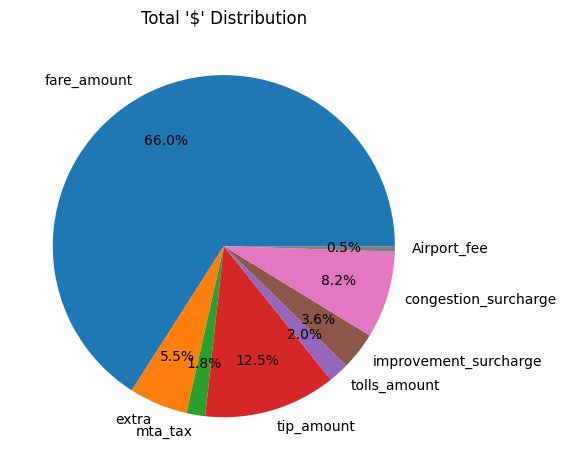

In [98]:
# fig, axes = plt.subplots(1,3, figsize=(10,3))

#Making a PIE chart to understand the distribution of money spent

plt.pie(list(sum_amounts(df_timeless).values()), labels=list(sum_amounts(df_timeless).keys()), autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1)
plt.title("Total '$' Distribution")
plt.tight_layout()
plt.show()

In [99]:
#lets see which trip was the longest as per time
df['trip_duration'].describe().astype(int)
df_timeless['trip_duration'].describe().astype(int)

count    2824462
mean          15
std           35
min          -13
25%            7
50%           11
75%           18
max         9455
Name: trip_duration, dtype: int64

HMMM!! Suspisious! How can Max "trip_duration" be of 9455 minutes & Min "trip_duration" be negative!? (Did they travel back in time!?) <br>
Let's check it 

If "trip_duration" is more, we can expect that the "total_amount" will also be big, because it is proportional, but if the "total_amount" is less, then it make no sense & can be dropped from our data set!

In [100]:
#Droping suspicious part of the data, we can understand by logic that a trip will cost more than 100 dollar if it travel for more than 1hr+
#Hence, we are dropping it from the df_timeless dataframe and original df

df_timeless.drop(df[(df_timeless['trip_duration'] > 180) & (df_timeless['total_amount'] < 100)].index, inplace=True) #threshold

df.drop(df[(df['trip_duration'] > 180) & (df['total_amount'] < 100)].index, inplace=True) #threshold

/var/folders/3x/2zdd2ys9069dq6ld5yclngwc0000gn/T/ipykernel_90626/2539482030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['trip_duration'] > 180) & (df['total_amount'] < 100)].index, inplace=True) #threshold


Same logic goes for "travel_distance" too, so <br>
Let's do the same thing for 'travel_distance'!<br>
we will compare it with the price

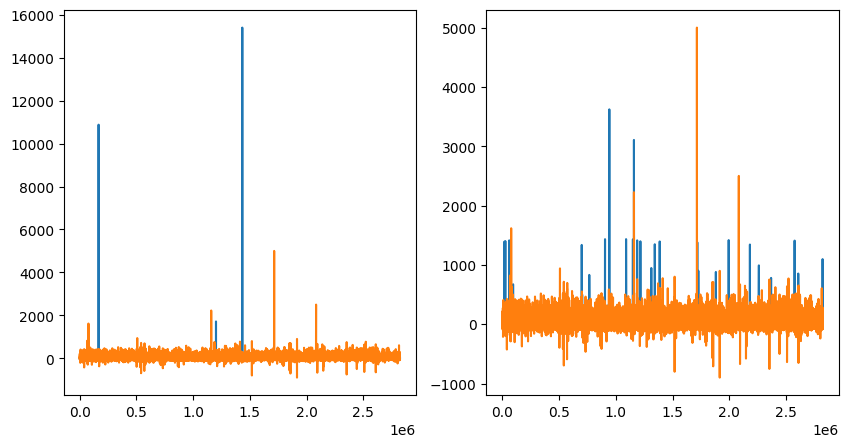

In [101]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(df.index, df['trip_distance'])
axes[0].plot(df.index, df['total_amount'])
axes[1].plot(df.index, df['trip_duration'])
axes[1].plot(df.index, df['total_amount'])
x = np.linspace(0, 1,100)
y = np.ones(100) * 5
axes[0].plot(x, y, linestyle=":", color = "black")
axes[1].plot(x, y, linestyle=":", color = "black")
# axes[1].plot(df['trip_duration'], df['total_amount'])
plt.show()


Observations:<br>

- We can see by the graphs that, there are a lot of NEGATIVE values, which doesnt really make sense, so we will eliminate this from the dataset. <br>

- We need to make sure that there is correlation between "trip_distance", "trip_duration" to "total_amount", if there are some data points which lack that, we are going to eliminate that data point


In [102]:
df[df['fare_amount'] < 0]
df_timeless[df_timeless['fare_amount'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
99,2,1.0,2.16,1.0,N,249,232,4,-13.5,-1.0,-0.5,0.00,0.00,-1.0,-18.50,-2.5,0.00,12.250000
506,2,1.0,0.01,5.0,N,63,63,2,-31.5,0.0,0.0,0.00,0.00,-1.0,-34.25,0.0,-1.75,0.733333
536,2,1.0,0.47,1.0,N,249,113,4,-5.8,-1.0,-0.5,0.00,0.00,-1.0,-10.80,-2.5,0.00,4.300000
552,2,1.0,5.48,1.0,N,107,61,2,-33.1,-1.0,-0.5,0.00,0.00,-1.0,-38.10,-2.5,0.00,32.516667
682,2,1.0,8.74,1.0,N,90,225,4,-47.8,-1.0,-0.5,0.00,0.00,-1.0,-52.80,-2.5,0.00,46.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824304,2,1.0,0.06,2.0,N,186,186,4,-70.0,0.0,-0.5,0.00,-6.94,-1.0,-80.94,-2.5,0.00,0.183333
2824334,2,1.0,0.00,1.0,N,132,132,3,-3.0,-1.0,-0.5,0.00,0.00,-1.0,-7.25,0.0,-1.75,0.300000
2824361,2,1.0,15.90,1.0,N,132,112,4,-61.1,-1.0,-0.5,12.72,0.00,-1.0,-52.63,0.0,-1.75,33.066667
2824372,2,1.0,2.82,1.0,N,132,132,3,-14.2,-1.0,-0.5,0.00,0.00,-1.0,-18.45,0.0,-1.75,8.183333


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822538 entries, 0 to 2824461
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [104]:
df_timeless.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822538 entries, 0 to 2824461
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int32  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   store_and_fwd_flag     object 
 5   PULocationID           int32  
 6   DOLocationID           int32  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
 16  Airport_fee            float64
 17  trip_duration          float64
dtypes: float64(13), int32(3), int64(1), object(1)
memory usage: 376.8+ MB


In [105]:
#converting into category
df['VendorID'].astype(object)
df['RatecodeID'].astype(object)
df['store_and_fwd_flag'].astype(object)
df['PULocationID'].astype(object)
df['DOLocationID'].astype(object)
df['payment_type'].astype(object)

0          2
1          1
2          1
3          1
4          1
          ..
2824457    1
2824458    1
2824459    1
2824460    2
2824461    1
Name: payment_type, Length: 2822538, dtype: object

In [106]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824457,2,2024-01-31 23:10:28,2024-01-31 23:18:30,1.0,3.51,1.0,N,138,129,1,16.3,6.0,0.5,4.76,0.0,1.0,30.31,0.0,1.75,8.033333
2824458,2,2024-01-31 23:01:04,2024-01-31 23:17:35,1.0,3.36,1.0,N,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.00,16.516667
2824459,1,2024-01-31 23:08:13,2024-01-31 23:25:00,3.0,3.30,1.0,N,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.00,16.783333
2824460,1,2024-01-31 23:49:46,2024-01-31 23:53:10,0.0,0.40,1.0,N,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.00,3.400000


In [107]:
def remove_neg_vals(df_timeless):
    # Create a boolean mask for non-negative values

        
    mask = (df_timeless >= 0).all(axis=1)
    
    # Apply the mask to keep only rows without negative values
    df_clean = df_timeless[mask]
    
    # Reset the index if needed
    df_clean.reset_index(drop=True, inplace=True)
    
    return df_clean

# Usage
df_clean = remove_neg_vals(df_timeless.drop(['store_and_fwd_flag'], axis=1))
df_clean

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00,19.800000
1,1,1.0,1.80,1.0,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00,6.600000
2,1,1.0,4.70,1.0,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00,17.916667
3,1,1.0,1.40,1.0,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00,8.300000
4,1,1.0,0.80,1.0,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787020,2,1.0,3.51,1.0,138,129,1,16.3,6.0,0.5,4.76,0.0,1.0,30.31,0.0,1.75,8.033333
2787021,2,1.0,3.36,1.0,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.00,16.516667
2787022,1,3.0,3.30,1.0,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.00,16.783333
2787023,1,0.0,0.40,1.0,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.00,3.400000


In [108]:
#let us recheck if there are any negative values left
df_clean[df_clean['fare_amount'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration


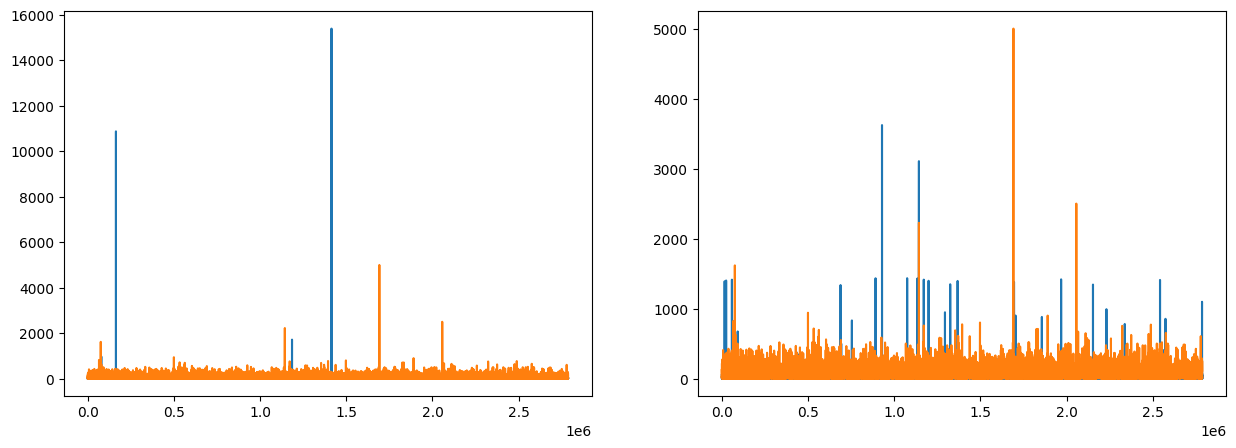

In [109]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(df_clean.index, df_clean['trip_distance'])
axes[0].plot(df_clean.index, df_clean['total_amount'])

axes[1].plot(df_clean.index, df_clean['trip_duration'])
axes[1].plot(df_clean.index, df_clean['total_amount'])
# axes[1].plot(df['trip_duration'], df['total_amount'])
plt.show()

PERFECT!!! <br>
We can clearly see that, we have eliminated all the negative values, like this we can be rest assured that our data is under good cleaning process!

Observations:<br>

We can clearly see that there are a lot of OUTLIERS!
Now our jobs seems to deal with Outliers, but before that, let us make sure if all the negative values are eliminated from the columns :)

In [110]:
df_clean.min() #Boom! A simple way to make sure there are no negative values left

VendorID                 1.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               1.0
PULocationID             1.0
DOLocationID             1.0
payment_type             1.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
trip_duration            0.0
dtype: float64

In [111]:
print(f'We went from {df.shape} -> {df_timeless.shape} -> {df_clean.shape}')

We went from (2822538, 20) -> (2822538, 18) -> (2787025, 17)


#### Taking care of OUTLIERS

In [112]:
df_clean.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'trip_duration'],
      dtype='object')

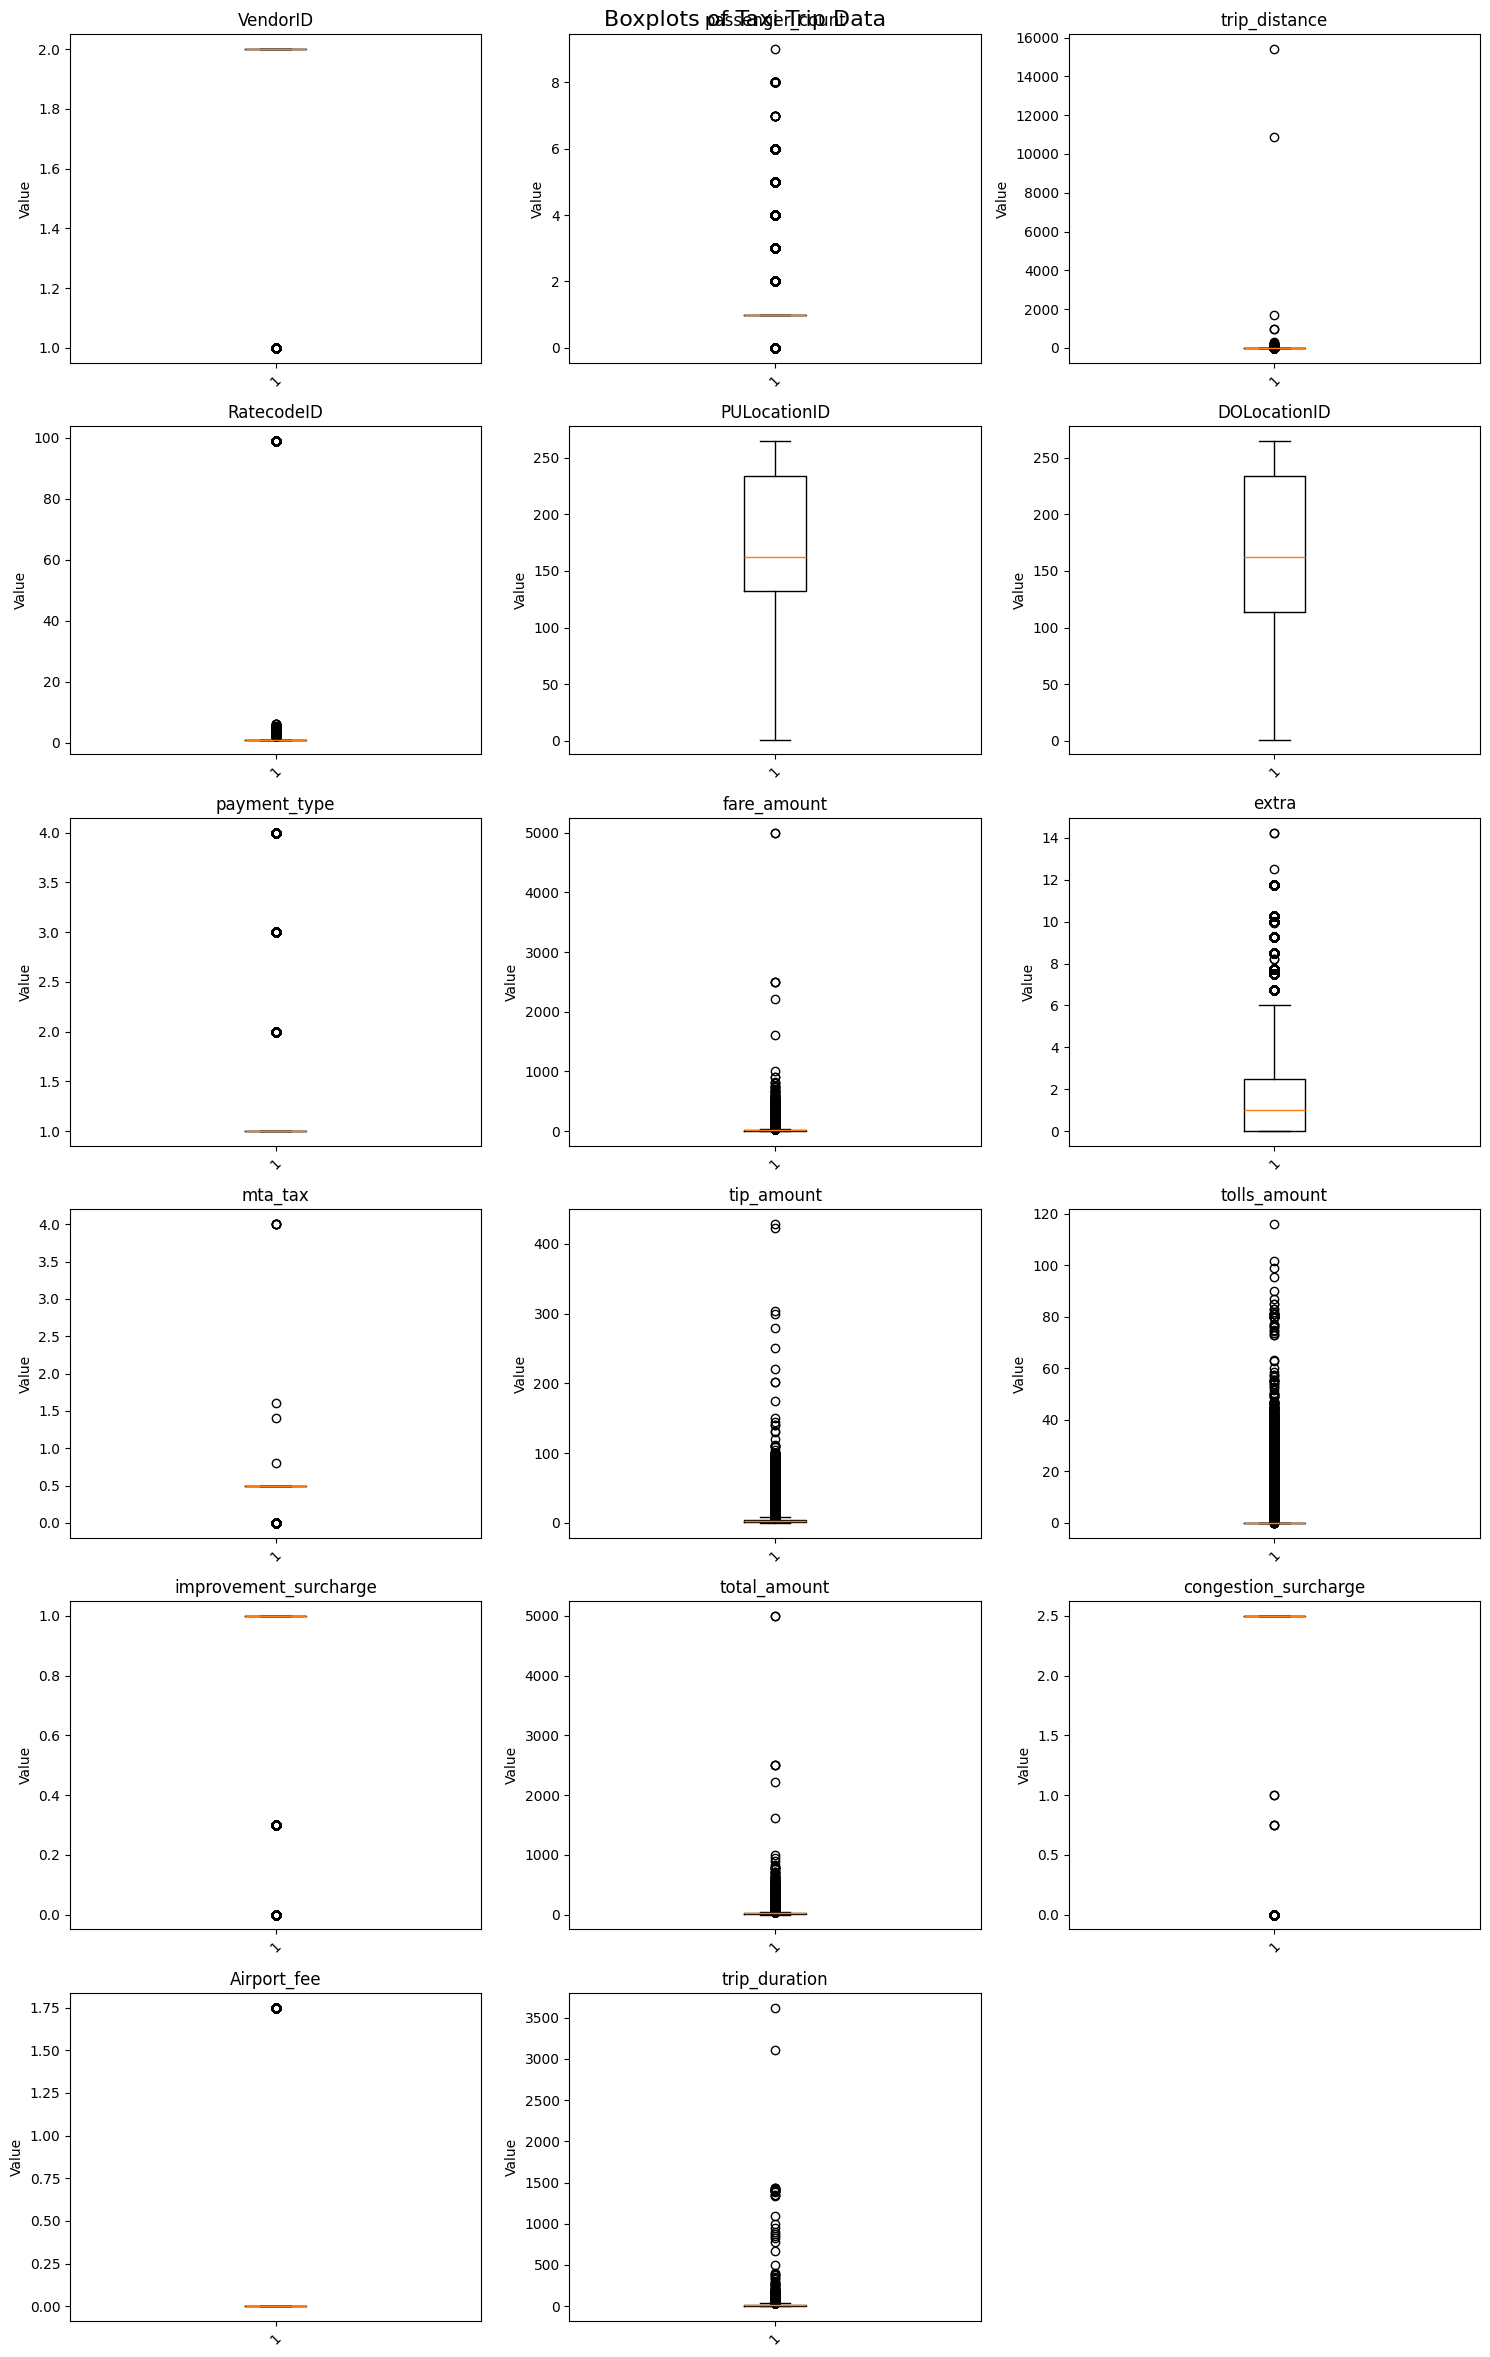

In [113]:
#lets visualie all the outliers in out datasets

# Calculate the number of rows needed
n_cols = 3
n_rows = (len(df_clean.columns) - 1) // n_cols + 1

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Boxplots of Taxi Trip Data', fontsize=16)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create boxplots for each column
for i, column in enumerate(df_clean.columns):
    axs[i].boxplot(df_clean[column].dropna())
    axs[i].set_title(column)
    axs[i].set_ylabel('Value')
    axs[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()




In [114]:
df_clean

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00,19.800000
1,1,1.0,1.80,1.0,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00,6.600000
2,1,1.0,4.70,1.0,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00,17.916667
3,1,1.0,1.40,1.0,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00,8.300000
4,1,1.0,0.80,1.0,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787020,2,1.0,3.51,1.0,138,129,1,16.3,6.0,0.5,4.76,0.0,1.0,30.31,0.0,1.75,8.033333
2787021,2,1.0,3.36,1.0,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.00,16.516667
2787022,1,3.0,3.30,1.0,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.00,16.783333
2787023,1,0.0,0.40,1.0,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.00,3.400000


In [115]:
df_clean['trip_duration'].describe().astype('int').round(5) #OUTLIER REMOVAL REQUIRED
df_clean['trip_distance'].describe().astype('int').round(5) #OUTLIER REMOVAL REQUIRED
df_clean['tip_amount'].describe().astype('float32').round(3) #OUTLIER REMOVAL REQUIRED
df_clean['tolls_amount'].describe().astype('int').round(5) #OUTLIER REMOVAL REQUIRED
df_clean['fare_amount'].describe().astype('float32').round(3) #OUTLIER REMOVAL REQUIRED
df_clean['total_amount'].describe().astype('float32').round(3) #OUTLIER REMOVAL REQUIRED
df_clean['extra'].describe().astype('float32').round(4)

count    2.787025e+06
mean     1.548400e+00
std      1.801100e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.500000e+00
max      1.425000e+01
Name: extra, dtype: float32

In [116]:
for i in df_clean.drop(['VendorID','passenger_count','RatecodeID', 'PULocationID','DOLocationID','payment_type','mta_tax','improvement_surcharge','congestion_surcharge'],axis=1).columns:
    Q1 = df_clean[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    uppper_bound = Q3 + 1.5*IQR
    df_clean =  df_clean[(df_clean[i] >= lower_bound) & (df_clean[i] <= uppper_bound)]

df_clean

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,1.0,1.80,1.0,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,1.0,4.70,1.0,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,1.0,1.40,1.0,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,1.0,0.80,1.0,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787018,2,1.0,1.94,1.0,161,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,8.833333
2787021,2,1.0,3.36,1.0,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,16.516667
2787022,1,3.0,3.30,1.0,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.0,16.783333
2787023,1,0.0,0.40,1.0,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.0,3.400000


In [117]:
df_clean

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,1.0,1.80,1.0,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,1.0,4.70,1.0,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,1.0,1.40,1.0,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,1.0,0.80,1.0,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787018,2,1.0,1.94,1.0,161,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,8.833333
2787021,2,1.0,3.36,1.0,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,16.516667
2787022,1,3.0,3.30,1.0,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.0,16.783333
2787023,1,0.0,0.40,1.0,142,163,2,5.1,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.0,3.400000


In [118]:
df_clean.passenger_count.max()

np.float64(9.0)

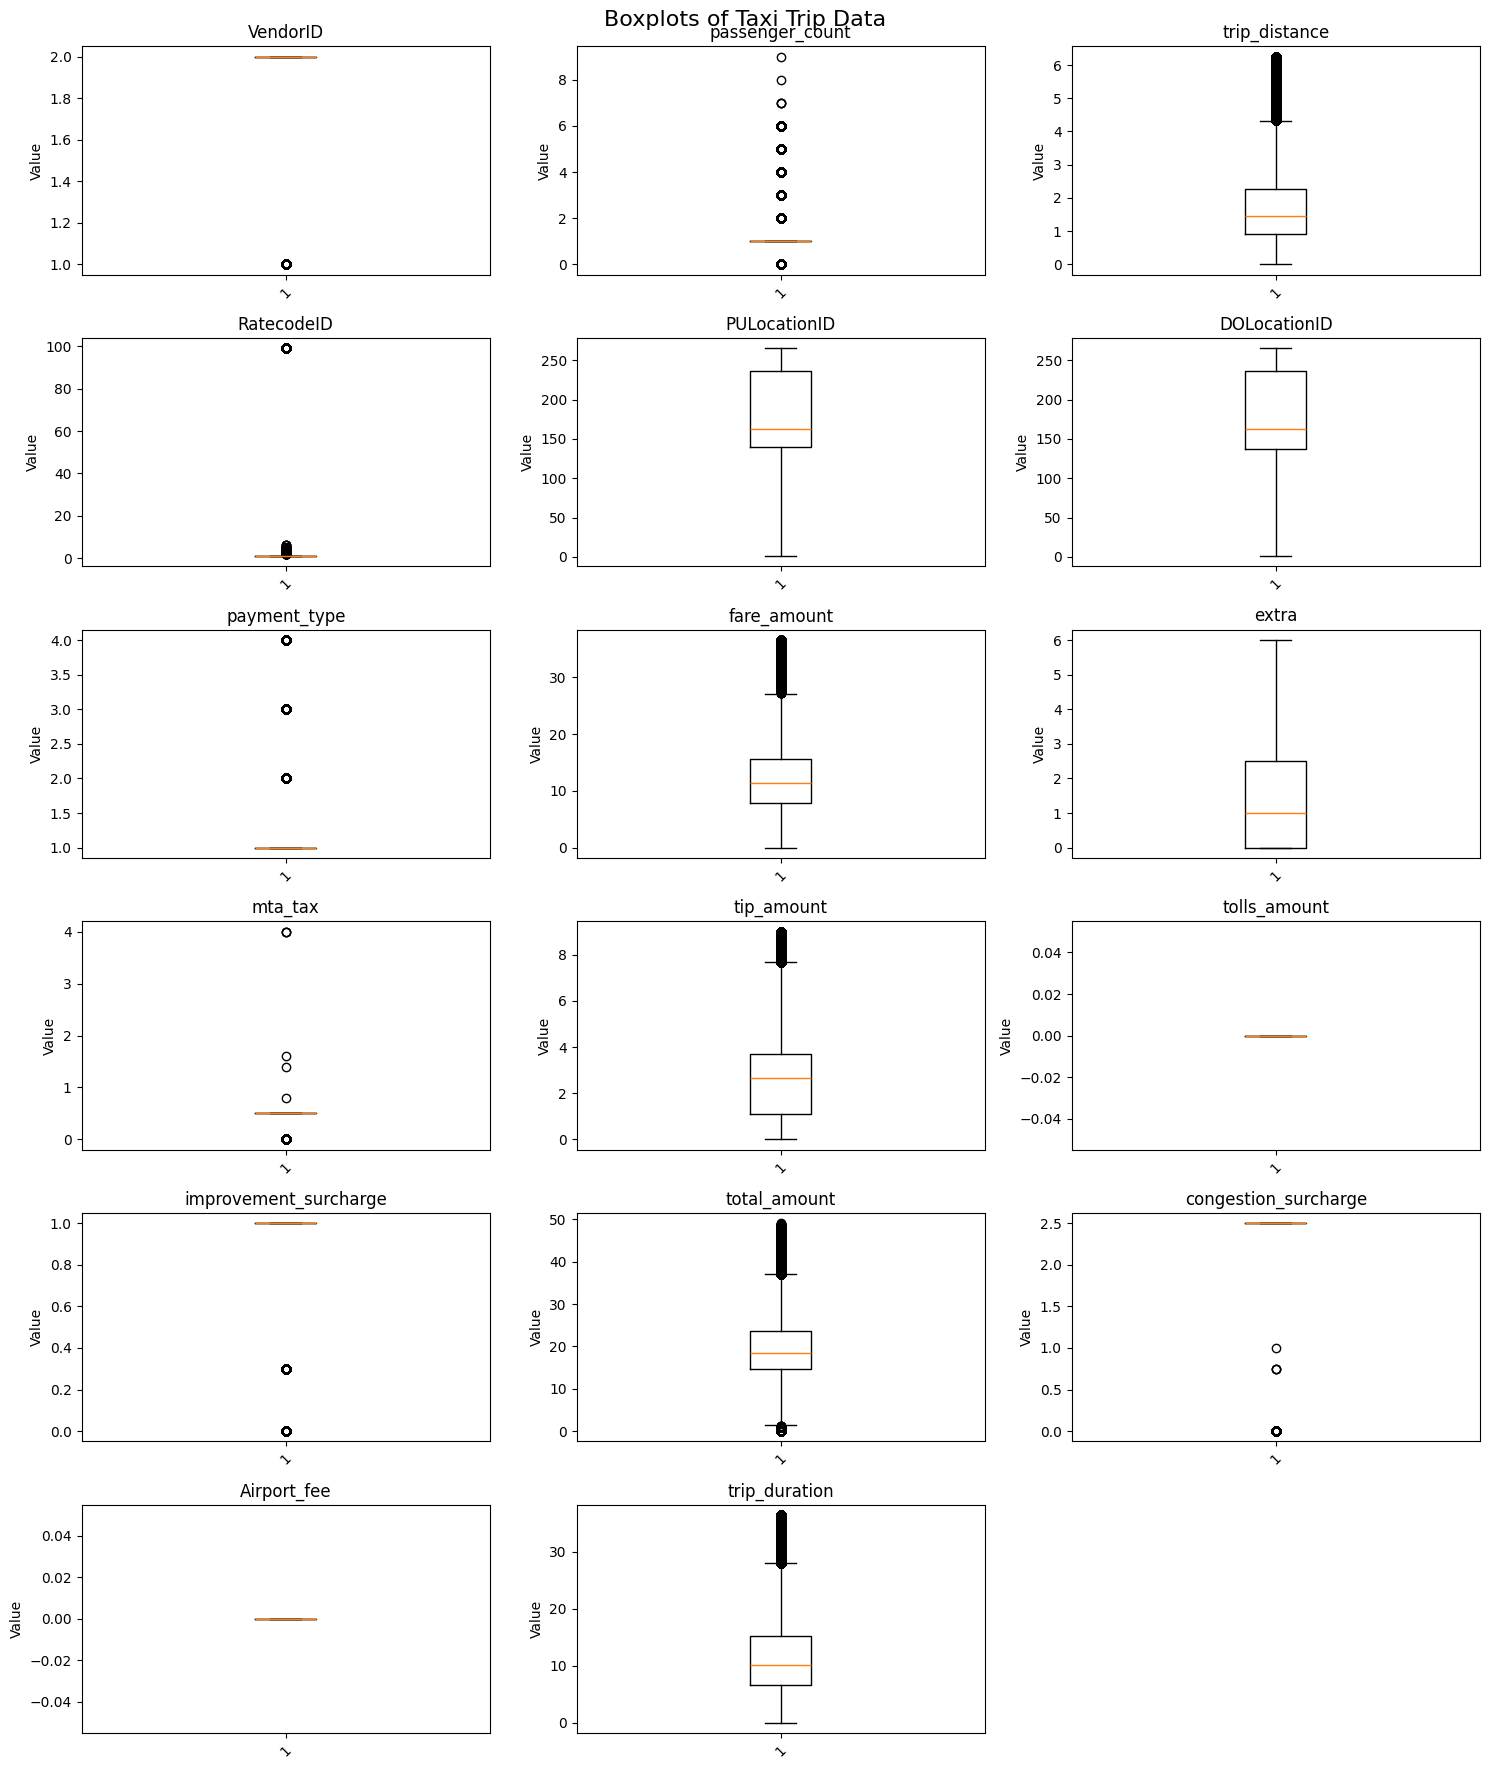

In [119]:
#lets visualie all the outliers in out datasets

# Calculate the number of rows needed
n_cols = 3
n_rows = (len(df_clean.columns) - 1) // n_cols + 1

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
fig.suptitle('Boxplots of Taxi Trip Data', fontsize=16)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create boxplots for each column
for i, column in enumerate(df_clean.columns):
    axs[i].boxplot(df_clean[column].dropna())
    axs[i].set_title(column)
    axs[i].set_ylabel('Value')
    axs[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

After Handling all the outliers, we can see that the data is ready for us to perform machine learning models.

In [123]:
'''0 Passenger Count doesnt give us any info, hence we should remove it'''
df_clean = df_clean[df_clean['passenger_count']!=0]
df_clean

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,1.0,1.80,1.0,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,1.0,4.70,1.0,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,1.0,1.40,1.0,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,1.0,0.80,1.0,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787016,2,1.0,4.54,1.0,234,256,1,26.1,1.0,0.5,4.00,0.0,1.0,35.10,2.5,0.0,25.466667
2787018,2,1.0,1.94,1.0,161,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,8.833333
2787021,2,1.0,3.36,1.0,162,261,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,16.516667
2787022,1,3.0,3.30,1.0,43,249,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.0,16.783333


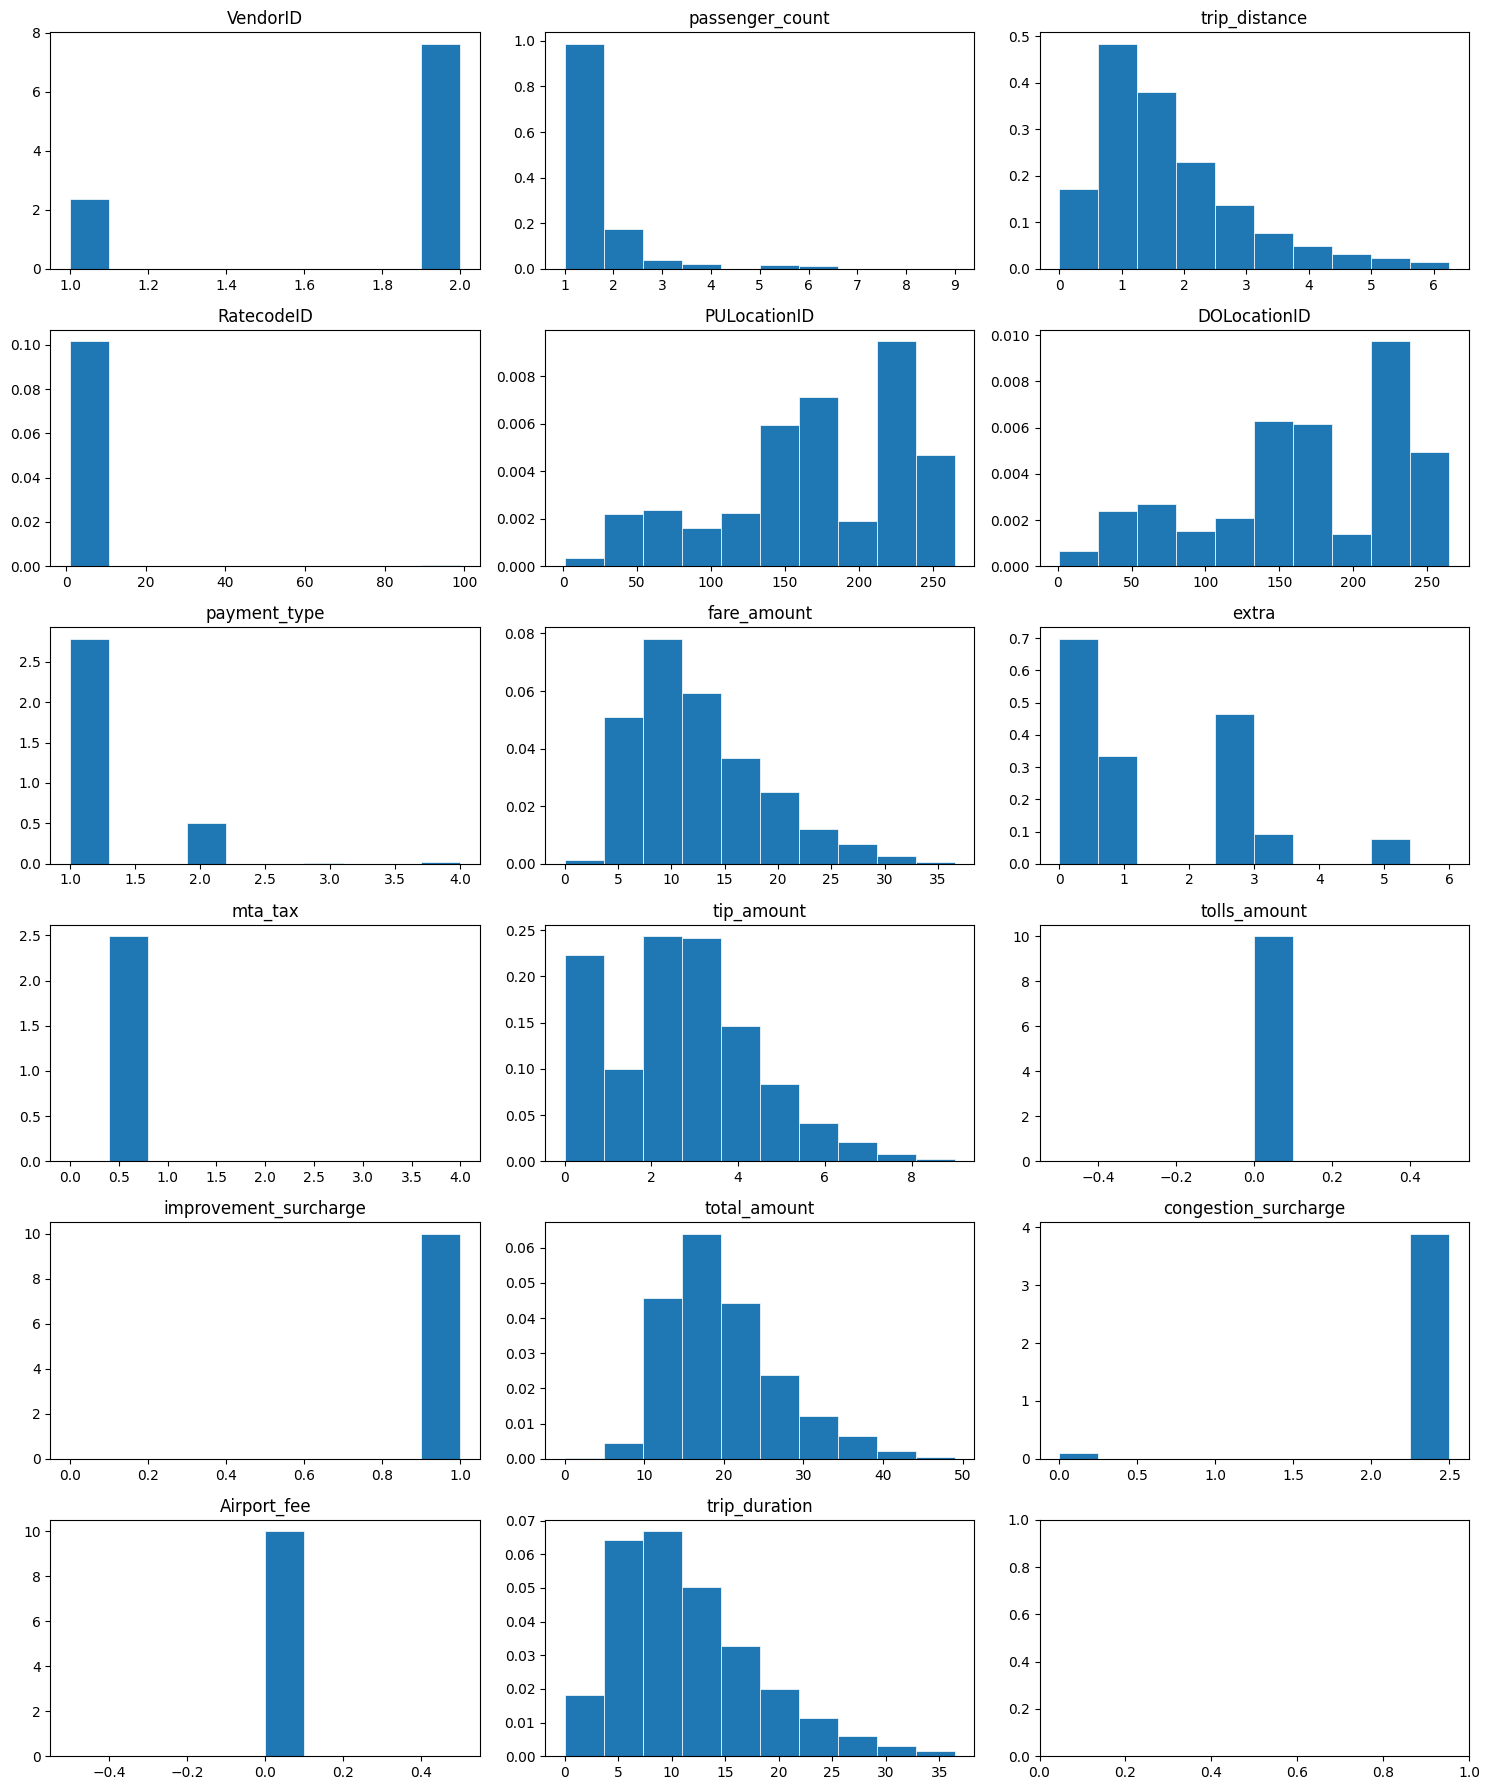

In [124]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))

axes = axes.flatten()

for i, column in enumerate(df_clean.columns):
    axes[i].hist(df_clean[column],linewidth=0.5, edgecolor="white", density = True)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

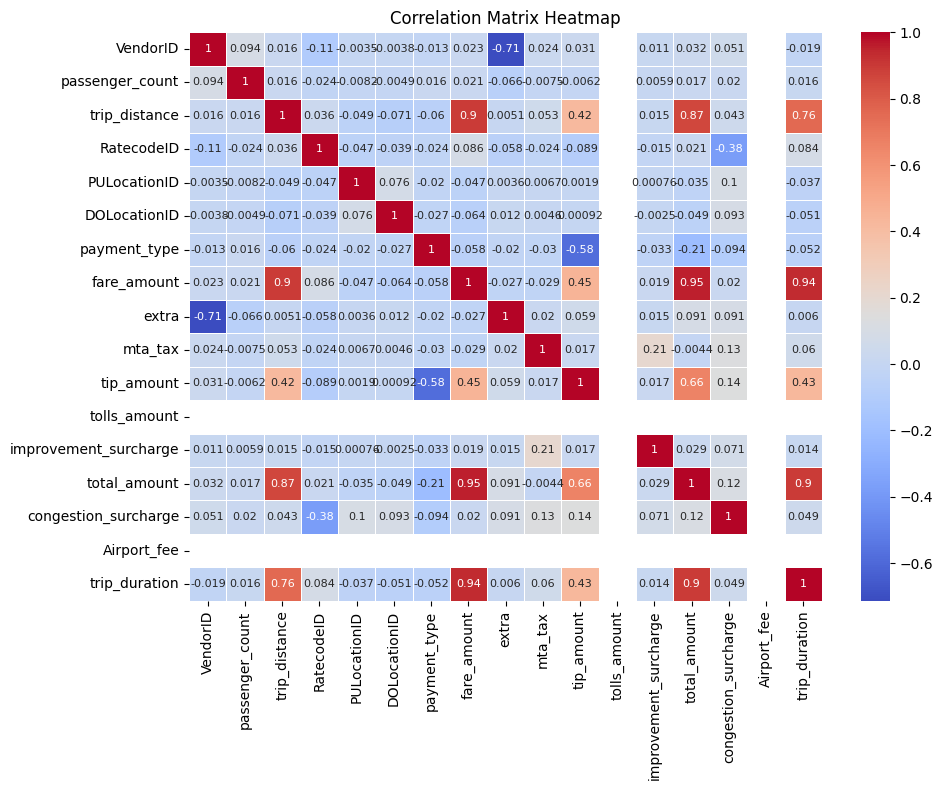

In [68]:
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(df_clean.corr(), annot=True, annot_kws={"fontsize":8},cmap='coolwarm', linewidths=.5) #annot for values
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Observations:<br>

- We can see Strong Positive Correlation Between (fare_amount, total_amount), (fare_amount, trip_duration), (fare_amount, trip_distance), (total_amount, trip_duration), (total_amount, trip_distance), (tip_amount, total_amount), (trip_duration, trip_distance) among many others

/Users/karnavivek/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


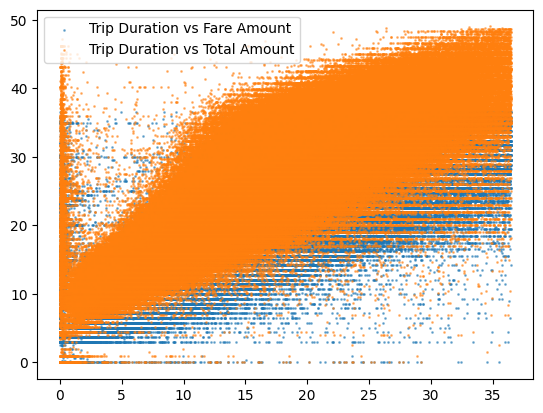

In [69]:
plt.scatter(df_clean['trip_duration'], df_clean['fare_amount'], s=1, alpha=0.5, label = 'Trip Duration vs Fare Amount')
# plt.plot(df_clean['trip_duration'], df_clean['fare_amount'], axis=1)
plt.scatter(df_clean['trip_duration'], df_clean['total_amount'], s=1, alpha=0.5, label = 'Trip Duration vs Total Amount')
plt.legend()
plt.show()

## Data Analysis & Predictions

Now that our data is clean & free from all the datapoints which could extrapolate our prediction, we are ready to perform various machine learning models to gain insights on predictions.<br>

The type pf prediction we are looking for can change based on what question we are asking! Here, we wonder how much does NYC taxi would cost anyone if they input the distance, & other factors mentioned in this study :) <br>

Hence, we are going to make "total_amount" as our target variable & all other features will help us predict it.



In [155]:
'''It is a good pratice to understand our linear model before fitting sklearn'''

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_amount   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.141e+09
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                        0.00
Time:                        03:38:20   Log-Likelihood:                      4.5753e+05
No. Observations:             1629369   AIC:                                 -9.150e+05
Df Residuals:                 1629350   BIC:                                 -9.148e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0037      0.001      2.733      0.006       0.001       0.006
x2            -0.0784      0.002    -32.440      0.000      -0.083      -0.074
x3            36.7543      0.006   6459.276      0.000      36.743      36.765
x4             5.8270      0.001   6584.665      0.000       5.825       5.829
x5             1.8424      0.037     49.418      0.000       1.769       1.915
x6             9.0210      0.001   7947.377      0.000       9.019       9.023
const       1.734e-15   2.08e-17     83.349      0.000    1.69e-15    1.78e-15
x7            -0.4807      0.005   -100.347      0.000      -0.490      -0.471
x8             1.8725      0.001   1888.012      0.000       1.871       1.874
x9         -2.864e-15   3.17e-17    -90.351      0.000   -2.93e-15    -2.8e-15
x10           -0.0671      0.003    -20.029      0.000      -0.074      -0.061
x11            2.3711      0.000   4775.794      0.000       2.370       2.372
x12           -0.0311      0.038     -0.816      0.414      -0.106       0.044
x13           -0.5063      0.011    -44.923      0.000      -0.528      -0.484
x14           -0.1107      0.025     -4.406      0.000      -0.160      -0.061
x15           -0.0654      0.005    -12.190      0.000      -0.076      -0.055
x16           -0.5372      0.106     -5.092      0.000      -0.744      -0.330
x17            1.7281      0.003    657.219      0.000       1.723       1.733
x18            0.0091      0.001     16.477      0.000       0.008       0.010
x19            0.0610      0.002     27.635      0.000       0.057       0.065
x20            0.0127      0.002      7.890      0.000       0.010       0.016
==============================================================================
Omnibus:                  2113020.012   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        560194624.468
Skew:                           7.191   Prob(JB):                         0.00
Kurtosis:                      92.692   Cond. No.                     7.12e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [133]:
df_clean

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,2,17.7,1.0,0.5,0.00,0.0,1.0,2.5,0.0,19.800000
1,1,1.0,1.80,1.0,1,10.0,3.5,0.5,3.75,0.0,1.0,2.5,0.0,6.600000
2,1,1.0,4.70,1.0,1,23.3,3.5,0.5,3.00,0.0,1.0,2.5,0.0,17.916667
3,1,1.0,1.40,1.0,1,10.0,3.5,0.5,2.00,0.0,1.0,2.5,0.0,8.300000
4,1,1.0,0.80,1.0,1,7.9,3.5,0.5,3.20,0.0,1.0,2.5,0.0,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787016,2,1.0,4.54,1.0,1,26.1,1.0,0.5,4.00,0.0,1.0,2.5,0.0,25.466667
2787018,2,1.0,1.94,1.0,1,11.4,1.0,0.5,3.28,0.0,1.0,2.5,0.0,8.833333
2787021,2,1.0,3.36,1.0,1,18.4,1.0,0.5,5.85,0.0,1.0,2.5,0.0,16.516667
2787022,1,3.0,3.30,1.0,1,17.7,3.5,0.5,1.00,0.0,1.0,2.5,0.0,16.783333


In [80]:
df_clean[df_clean['passenger_count']==0]

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
7,1,0.0,3.0,1.0,246,231,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.0,28.000000
260,1,0.0,2.9,1.0,87,79,1,14.9,3.5,0.5,5.00,0.0,1.0,24.90,2.5,0.0,8.650000
342,1,0.0,2.5,1.0,90,229,1,17.0,3.5,0.5,5.50,0.0,1.0,27.50,2.5,0.0,22.900000
445,1,0.0,3.4,1.0,137,263,1,15.6,3.5,0.5,2.06,0.0,1.0,22.66,2.5,0.0,11.700000
446,1,0.0,2.6,1.0,263,170,1,14.9,3.5,0.5,3.95,0.0,1.0,23.85,2.5,0.0,13.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786704,1,0.0,1.1,1.0,161,107,1,7.2,3.5,0.5,2.40,0.0,1.0,14.60,2.5,0.0,4.500000
2786779,1,0.0,0.9,1.0,170,186,1,9.3,3.5,0.5,2.00,0.0,1.0,16.30,2.5,0.0,7.833333
2786780,1,0.0,4.8,1.0,68,226,1,31.0,3.5,0.5,7.20,0.0,1.0,43.20,2.5,0.0,29.733333
2786934,1,0.0,2.4,1.0,230,107,1,16.3,3.5,0.5,4.25,0.0,1.0,25.55,2.5,0.0,16.683333


Before that, lets make 2 turn some of our features into categorial data type as they should be, needed for linear regressio study!<br>

Features that are Categorical:
1) VendorID
2) RatecodeID
3) payment_type

PULocationID and DOLocationID are dropped because of large number of classes which can cause High Cardinality

In [129]:
df_clean.drop(columns=['PULocationID', 'DOLocationID'], inplace=True, axis=1)
df_clean

/var/folders/3x/2zdd2ys9069dq6ld5yclngwc0000gn/T/ipykernel_90626/3030843153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['PULocationID', 'DOLocationID'], inplace=True, axis=1)


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,1.0,1.80,1.0,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,1.0,4.70,1.0,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,1.0,1.40,1.0,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,1.0,0.80,1.0,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787016,2,1.0,4.54,1.0,1,26.1,1.0,0.5,4.00,0.0,1.0,35.10,2.5,0.0,25.466667
2787018,2,1.0,1.94,1.0,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,8.833333
2787021,2,1.0,3.36,1.0,1,18.4,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.0,16.516667
2787022,1,3.0,3.30,1.0,1,17.7,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.0,16.783333


In [130]:
y = df_clean['total_amount']
X = df_clean.drop(columns=['total_amount'], inplace=True, axis=1)

/var/folders/3x/2zdd2ys9069dq6ld5yclngwc0000gn/T/ipykernel_90626/3477554674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X = df_clean.drop(columns=['total_amount'], inplace=True, axis=1)


In [146]:
X = df_clean.copy()
X

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_duration
0,2,1.0,1.72,1.0,2,17.7,1.0,0.5,0.00,0.0,1.0,2.5,0.0,19.800000
1,1,1.0,1.80,1.0,1,10.0,3.5,0.5,3.75,0.0,1.0,2.5,0.0,6.600000
2,1,1.0,4.70,1.0,1,23.3,3.5,0.5,3.00,0.0,1.0,2.5,0.0,17.916667
3,1,1.0,1.40,1.0,1,10.0,3.5,0.5,2.00,0.0,1.0,2.5,0.0,8.300000
4,1,1.0,0.80,1.0,1,7.9,3.5,0.5,3.20,0.0,1.0,2.5,0.0,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787016,2,1.0,4.54,1.0,1,26.1,1.0,0.5,4.00,0.0,1.0,2.5,0.0,25.466667
2787018,2,1.0,1.94,1.0,1,11.4,1.0,0.5,3.28,0.0,1.0,2.5,0.0,8.833333
2787021,2,1.0,3.36,1.0,1,18.4,1.0,0.5,5.85,0.0,1.0,2.5,0.0,16.516667
2787022,1,3.0,3.30,1.0,1,17.7,3.5,0.5,1.00,0.0,1.0,2.5,0.0,16.783333


In [136]:
y

0          22.70
1          18.75
2          31.30
3          17.00
4          16.10
           ...  
2787016    35.10
2787018    19.68
2787021    29.25
2787022    23.70
2787024    16.32
Name: total_amount, Length: 2327671, dtype: float64

In [137]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2327671 entries, 0 to 2787024
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int32  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   payment_type           int64  
 5   fare_amount            float64
 6   extra                  float64
 7   mta_tax                float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  improvement_surcharge  float64
 11  congestion_surcharge   float64
 12  Airport_fee            float64
 13  trip_duration          float64
dtypes: float64(12), int32(1), int64(1)
memory usage: 257.5 MB


Categorical Features:
- VendorID
- RatecodeID
- Payment type


In [190]:
df_clean['VendorID'].value_counts(), df_clean['RatecodeID'].value_counts(), df_clean['payment_type'].value_counts()

(VendorID
 2    1775394
 1     580030
 Name: count, dtype: int64,
 RatecodeID
 1.0     2341012
 99.0       8892
 5.0        4898
 3.0         511
 4.0          71
 2.0          36
 6.0           4
 Name: count, dtype: int64,
 payment_type
 1    1968150
 2     356530
 4      19637
 3      11107
 Name: count, dtype: int64)

In [142]:
X['RatecodeID'] = X['RatecodeID'].astype('object')
X['VendorID'] = X['VendorID'].astype('object')
X['payment_type'] = X['payment_type'].astype('object')

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2327671 entries, 0 to 2787024
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             object 
 4   payment_type           object 
 5   fare_amount            float64
 6   extra                  float64
 7   mta_tax                float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  improvement_surcharge  float64
 11  congestion_surcharge   float64
 12  Airport_fee            float64
 13  trip_duration          float64
dtypes: float64(11), object(3)
memory usage: 266.4+ MB


In [147]:
X = pd.get_dummies(X, columns=['VendorID', 'RatecodeID', 'payment_type'], dtype=int, drop_first=True)

In [148]:
X

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,...,VendorID_2,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,payment_type_2,payment_type_3,payment_type_4
0,1.0,1.72,17.7,1.0,0.5,0.00,0.0,1.0,2.5,0.0,...,1,0,0,0,0,0,0,1,0,0
1,1.0,1.80,10.0,3.5,0.5,3.75,0.0,1.0,2.5,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,4.70,23.3,3.5,0.5,3.00,0.0,1.0,2.5,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.40,10.0,3.5,0.5,2.00,0.0,1.0,2.5,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.80,7.9,3.5,0.5,3.20,0.0,1.0,2.5,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787016,1.0,4.54,26.1,1.0,0.5,4.00,0.0,1.0,2.5,0.0,...,1,0,0,0,0,0,0,0,0,0
2787018,1.0,1.94,11.4,1.0,0.5,3.28,0.0,1.0,2.5,0.0,...,1,0,0,0,0,0,0,0,0,0
2787021,1.0,3.36,18.4,1.0,0.5,5.85,0.0,1.0,2.5,0.0,...,1,0,0,0,0,0,0,0,0,0
2787022,3.0,3.30,17.7,3.5,0.5,1.00,0.0,1.0,2.5,0.0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
'''Normalizing the training set'''

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = scaler.fit(X)
X_scaled = model.transform(X)
X_scaled

array([[0.        , 0.2752    , 0.48360656, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.288     , 0.27322404, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.752     , 0.63661202, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5376    , 0.50273224, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.528     , 0.48360656, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2528    , 0.23497268, ..., 0.        , 0.        ,
        0.        ]])

In [150]:
X_scaled.shape

(2327671, 21)

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1629369, 21), (698302, 21), (1629369,), (698302,))

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
model_LR.score(X_train, y_train)


0.9993111131786098

In [158]:
y_pred = model_LR.predict(X_test)
y_pred

array([27.22026794, 11.768403  , 14.06257717, ..., 15.9706004 ,
       13.85745378, 23.86836713])

In [159]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.03294880228656395

In [160]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

736908938239.8567

In [162]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9993166149047679

In [163]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

0.05201847229312776